
# This script contains the following contents:




Step 1 - Create visualization to show distribution of profiles

Step 2 - Produce suitable scatterplots



In [62]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [63]:
#Creating path
path= '/Users/milivanili/Desktop/ Instacart Basket Analysis '

In [64]:
df_big=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_big_final.pkl'))

In [68]:
column_names = df_big.columns.tolist()

In [69]:
column_names

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'order_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'Busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'average_spend',
 'spender_flag',
 'Customer_frequency',
 'frequency_flag',
 'First Name',
 'Surnam',
 'Gender',
 'State',
 'Age',
 'dependants',
 'family_status',
 'income',
 '_merge',
 'regions',
 'spending_flag',
 'customer_activity',
 'low_activity_flag']

In [93]:
df_big['order_id'].max()

3421083

In [99]:
# Calculate the number of orders per customer
orders_per_customer = df_big['max_order'].value_counts()

In [91]:
df_big.loc[df_big['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'
df_big.loc[(df_big['max_order'] <= 40) & (df_big['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'
df_big.loc[df_big['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [92]:
df_big['loyalty_flag']

0           Regular customer
1           Regular customer
2           Regular customer
3           Regular customer
4           Regular customer
                  ...       
32399727        New customer
32399728        New customer
32399729        New customer
32399730        New customer
32399731        New customer
Name: loyalty_flag, Length: 32399732, dtype: object

In [109]:
df_big[['user_id', 'loyalty_flag', 'order_number']].head(170)

,user_id,loyalty_flag,order_number
32399562,99622,New customer,2
32399563,99622,New customer,3
32399564,99622,New customer,4
32399565,99622,New customer,5
32399566,99622,New customer,6
...,...,...,...
32399727,80734,New customer,3
32399728,74506,New customer,1
32399729,74506,New customer,2
32399730,74506,New customer,3


In [114]:
df_big.loc[df_big['days_since_prior_order'] > 20, 'frequency_flag'] = 'Non-frequent customer'
df_big.loc[(df_big['days_since_prior_order'] <= 20) & (df_big['days_since_prior_order'] > 10), 'frequency_flag'] = 'Regular customer'
df_big.loc[df_big['days_since_prior_order'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [115]:
df_big['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent customer        19039687
Regular customer          6668658
Non-frequent customer     5229558
Frequent Customer          884427
Non_frequent_customer      577397
nan                             5
Name: count, dtype: int64

In [119]:
df_big[['user_id', 'Customer_frequency', 'prices']].head(60)

,user_id,Customer_frequency,prices
0,138,8.0,5.8
1,138,8.0,5.8
2,138,8.0,20.0
3,138,8.0,20.0
4,138,8.0,12.9
5,138,8.0,1.7
6,138,8.0,4.4
7,138,8.0,4.3
8,138,8.0,2.9
9,138,8.0,9.0


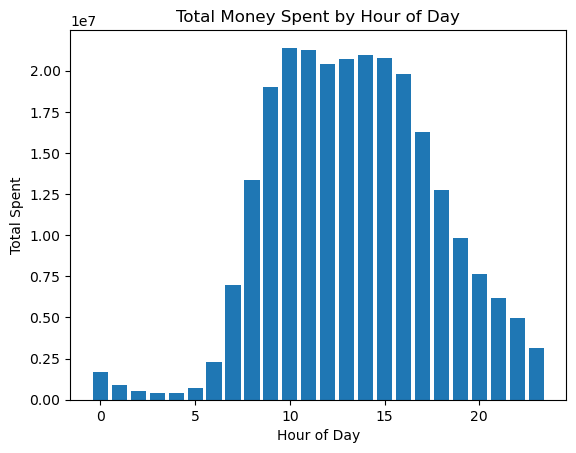

In [8]:
# Calculate the total spent each hour
total_spent_per_hour = df_big.groupby('order_hour_of_day')['prices'].sum()

# Create a bar chart
plt.bar(total_spent_per_hour.index, total_spent_per_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Total Spent")
plt.title("Total Money Spent by Hour of Day")
plt.show()

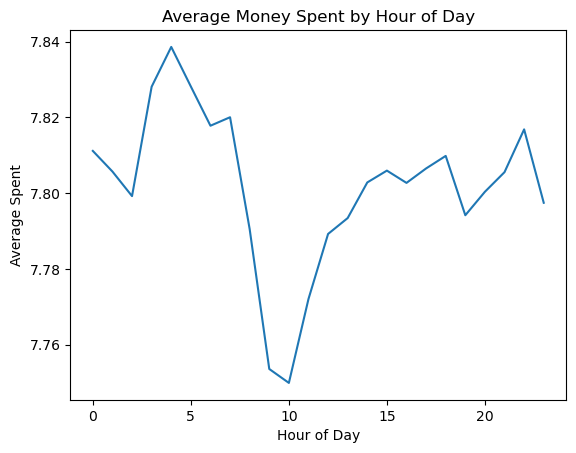

In [9]:
avg_spent_per_hour = df_big.groupby('order_hour_of_day')['prices'].mean()

# Create a line chart to visualize average spending
plt.plot(avg_spent_per_hour.index, avg_spent_per_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Average Spent")
plt.title("Average Money Spent by Hour of Day")
plt.show()

In [10]:
# Calculate the total spent each hour
total_spent_per_hour = df_big.groupby('order_hour_of_day')['prices'].sum()

# Find the hour(s) with the most money spent
most_spent_hours = total_spent_per_hour.idxmax(skipna=True)  # Handles cases with missing data

# Print how much they spend at the peak hour(s)
peak_spending_amount = total_spent_per_hour.max()

# Print results
print(f"People spend the most money at hour(s): {most_spent_hours}")
print(f"They spend a total of ${peak_spending_amount} during these peak hours.")


People spend the most money at hour(s): 10
They spend a total of $21399997.5 during these peak hours.


### Finding hour with most of spent

In [25]:
# Calculate the total spent each hour
total_spent_per_hour = df_big.groupby('order_hour_of_day')['prices'].sum()

# Find the hour(s) with the most money spent
most_spent_hours = total_spent_per_hour.idxmax(skipna=True)

# Calculate the total revenue for the peak hour(s)
peak_revenue = total_spent_per_hour.loc[most_spent_hours].sum()

# Print the results
print(f"Total revenue for the hour(s) with the most spending: ${peak_revenue}")

Total revenue for the hour(s) with the most spending: $40


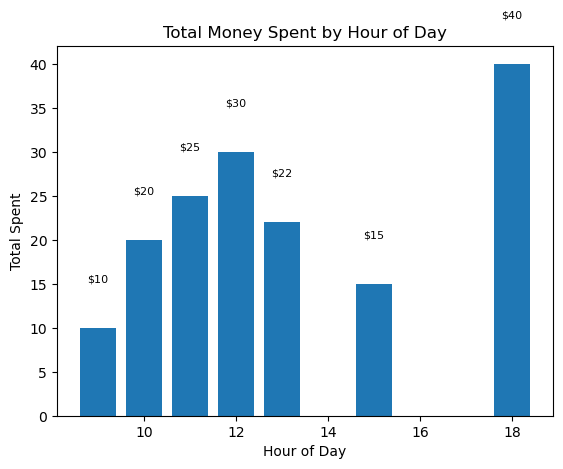

<Figure size 640x480 with 0 Axes>

In [41]:

# Calculate the total spent each hour
total_spent_per_hour = df_big.groupby('order_hour_of_day')['prices'].sum()

# Create a bar chart
bars = plt.bar(total_spent_per_hour.index, total_spent_per_hour.values)
plt.xlabel("Hour of Day")
plt.ylabel("Total Spent")
plt.title("Total Money Spent by Hour of Day")

# Add annotations for spent amount above each bar
for bar, value in zip(bars, total_spent_per_hour.values):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 5, f"${value}", ha='center', va='bottom', fontsize=8)  # Adjust offset and font size as needed

plt.show()

# Save the visualization as a PNG image (you can change the format like 'jpg' or 'pdf')

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'total_spent_per_hour.png'))


 # Step 1 - Create visualization to show distribution of profiles

In [5]:
# Seting the income thresholds for low and high income
low_income_threshold = 55000
high_income_threshold = 120000

In [6]:
# Creating customer profile by income column
df_big['income_profile'] = pd.cut(
    df_big['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['low income', 'middle income', 'high income'],
    include_lowest=True)

In [7]:
df_big['income_profile'].value_counts()

income_profile
middle income    18093095
high income       9566652
low income        4739985
Name: count, dtype: int64

In [8]:
# Familiy status count by customer profile
fam_status= pd.crosstab(df_big['income_profile'], df_big['family_status'], dropna = False)

In [9]:
# Create the age_group column with value as 'Unknown'
df_big['age_category'] = 'Unknown'

In [10]:
#Creating age group customer profil
df_big.loc[(df_big['Age'] >= 18) & (df_big['Age'] <= 28), 'age_category'] = 'young adult'
df_big.loc[(df_big['Age'] >= 29) & (df_big['Age'] <= 40), 'age_category'] = 'adult'
df_big.loc[(df_big['Age'] >= 41) & (df_big['Age'] <= 55), 'age_category'] = 'middle-aged'
df_big.loc[(df_big['Age'] >= 56) & (df_big['Age'] <= 70), 'age_category'] = 'senior'
df_big.loc[(df_big['Age'] >= 71) & (df_big['Age'] <= 81), 'age_category'] = 'elderly'

In [11]:
# Familiy status count by customer profile
age_income = pd.crosstab(df_big['income_profile'], df_big['age_category'], dropna = False)

In [12]:
age_income

age_category,adult,elderly,middle-aged,senior,young adult
income_profile,,,,,
low income,1396400,553566,786269,736409,1267341
middle income,4628936,2498330,3372595,3355362,4237872
high income,73633,2525397,3482611,3420984,64027


In [13]:
#Creating dependants
num_of_dependants=df_big['dependants'].value_counts()

In [14]:
num_of_dependants

dependants
3    8133827
0    8096275
2    8089749
1    8079881
Name: count, dtype: int64

In [15]:
# Converting data-type to string
df_big['income_profile'] = df_big['income_profile'].astype(str)

### Creating the Customer Profile Variable

In [16]:
# Creating new column customer_profile 
df_big['customer_profile'] = df_big['age_category'] + ', ' + df_big['income_profile']+','+df_big['family_status']

In [17]:
#Checking output
df_big['customer_profile'].head()

0    elderly, low income,married
1    elderly, low income,married
2    elderly, low income,married
3    elderly, low income,married
4    elderly, low income,married
Name: customer_profile, dtype: object

In [18]:
df_big['customer_profile'].value_counts()

customer_profile
adult, middle income,married                                   3473638
middle-aged, high income,married                               2608061
middle-aged, middle income,married                             2542487
senior, high income,married                                    2541667
senior, middle income,married                                  2519782
young adult, middle income,married                             2019076
elderly, high income,married                                   1892675
elderly, middle income,married                                 1869658
young adult, middle income,living with parents and siblings    1174657
adult, middle income,single                                    1155298
young adult, middle income,single                              1044139
adult, low income,married                                      1041941
middle-aged, high income,single                                 874550
middle-aged, middle income,single                           

In [19]:
# Create a subset to analyze customer ordering habbits.
customer_habbits = df_big[['user_id','prices','regions','Age','age_category','income','order_day_of_week','product_name','family_status','loyalty_flag','frequency_flag','max_order','dependants','spending_flag','customer_activity','customer_profile',]]

In [20]:
# Create flag to identify customers with dependants
df_big['dependant_mean'] = df_big.groupby(['user_id'])['dependants'].transform('mean')

In [21]:
# Set parameters for the flag

df_big.loc[df_big['dependant_mean'] > 0, 'dependant_flag'] = 'With Dependants'

In [22]:
df_big.loc[df_big['dependant_mean'] <= 0, 'dependant_flag'] = 'Without Dependants'

In [23]:
# Check output

df_big['dependant_flag'].value_counts(dropna = False)

dependant_flag
With Dependants       24303457
Without Dependants     8096275
Name: count, dtype: int64

In [24]:
# Revenue by Customer Profile

customer_profile_revenue = df_big.groupby('customer_profile')['prices'].sum()

In [25]:
 #Sort values

customer_profile_revenue_sorted = customer_profile_revenue.sort_values(ascending=False)

In [26]:
# Set colors

colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(customer_profile_revenue_sorted)))

In [27]:
#Set format for numerals

pd.set_option('display.float_format', lambda x: '%.2f' % x)

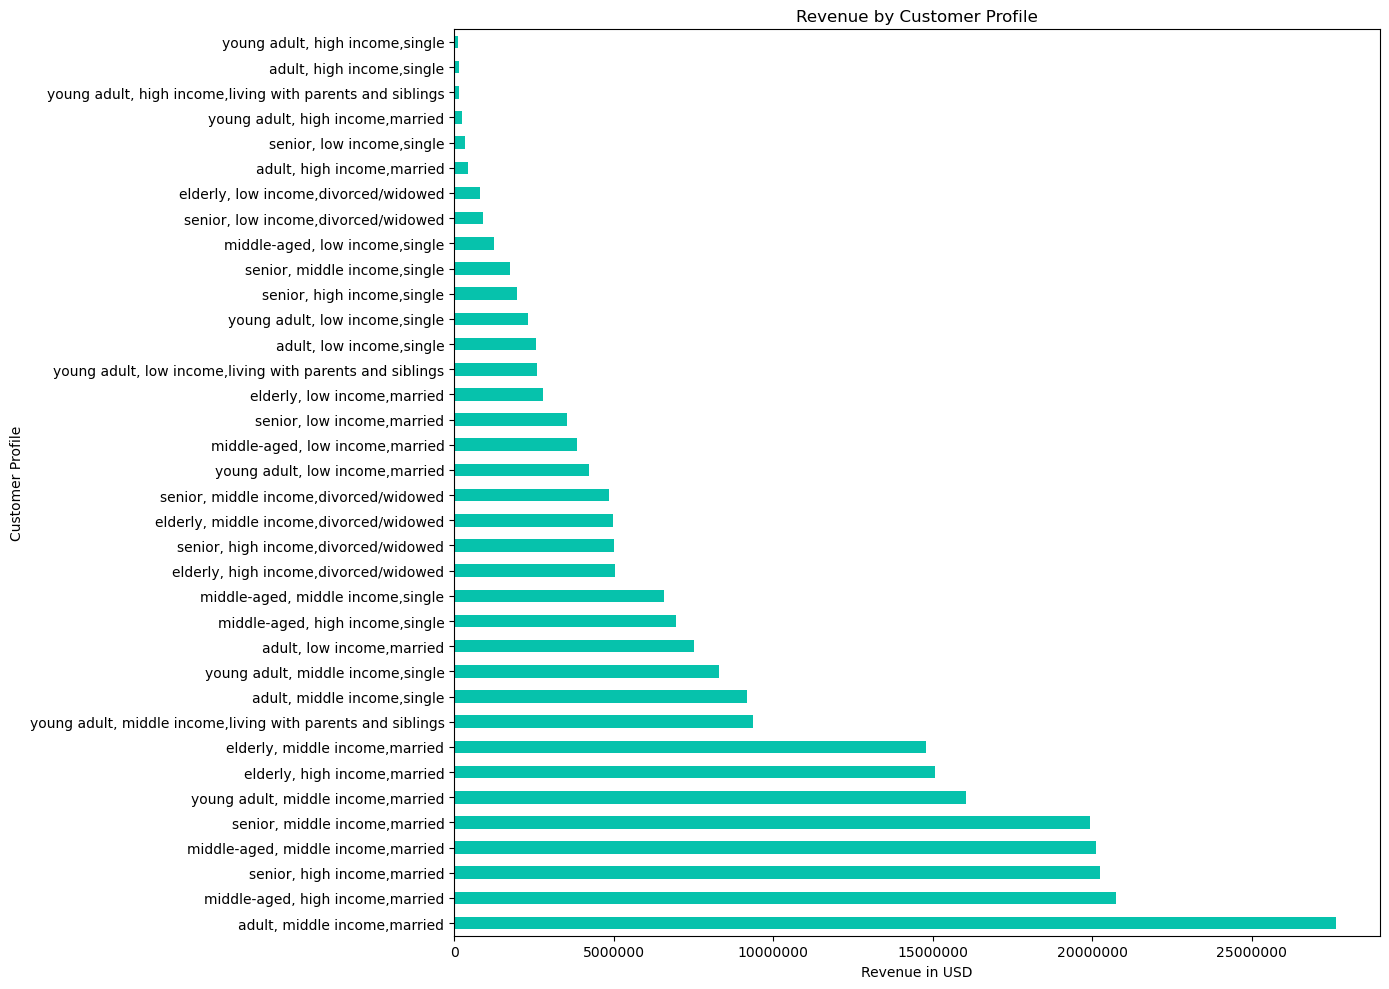

In [28]:
# Plot Horizontal Bar Chart for Revenue by Customer Profile

# Set the size of the figure
plt.figure(figsize=(14, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Revenue by Customer Profile
customer_profile_revenue_bar = customer_profile_revenue_sorted.plot.barh(
    title='Revenue by Customer Profile', xlabel='Revenue in USD', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')

plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Save Bar Chart

customer_profile_revenue_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_profile_revenue_bar.png'))

In [30]:
# How frequent do customer profiles order by week?

customer_profile_order_frequency = df_big.groupby('customer_profile')['order_day_of_week'].mean()

In [31]:
# Sort Values

customer_profile_order_frequency_sorted = customer_profile_order_frequency.sort_values(ascending=True)

In [32]:
# Set colors

colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(customer_profile_order_frequency_sorted)))

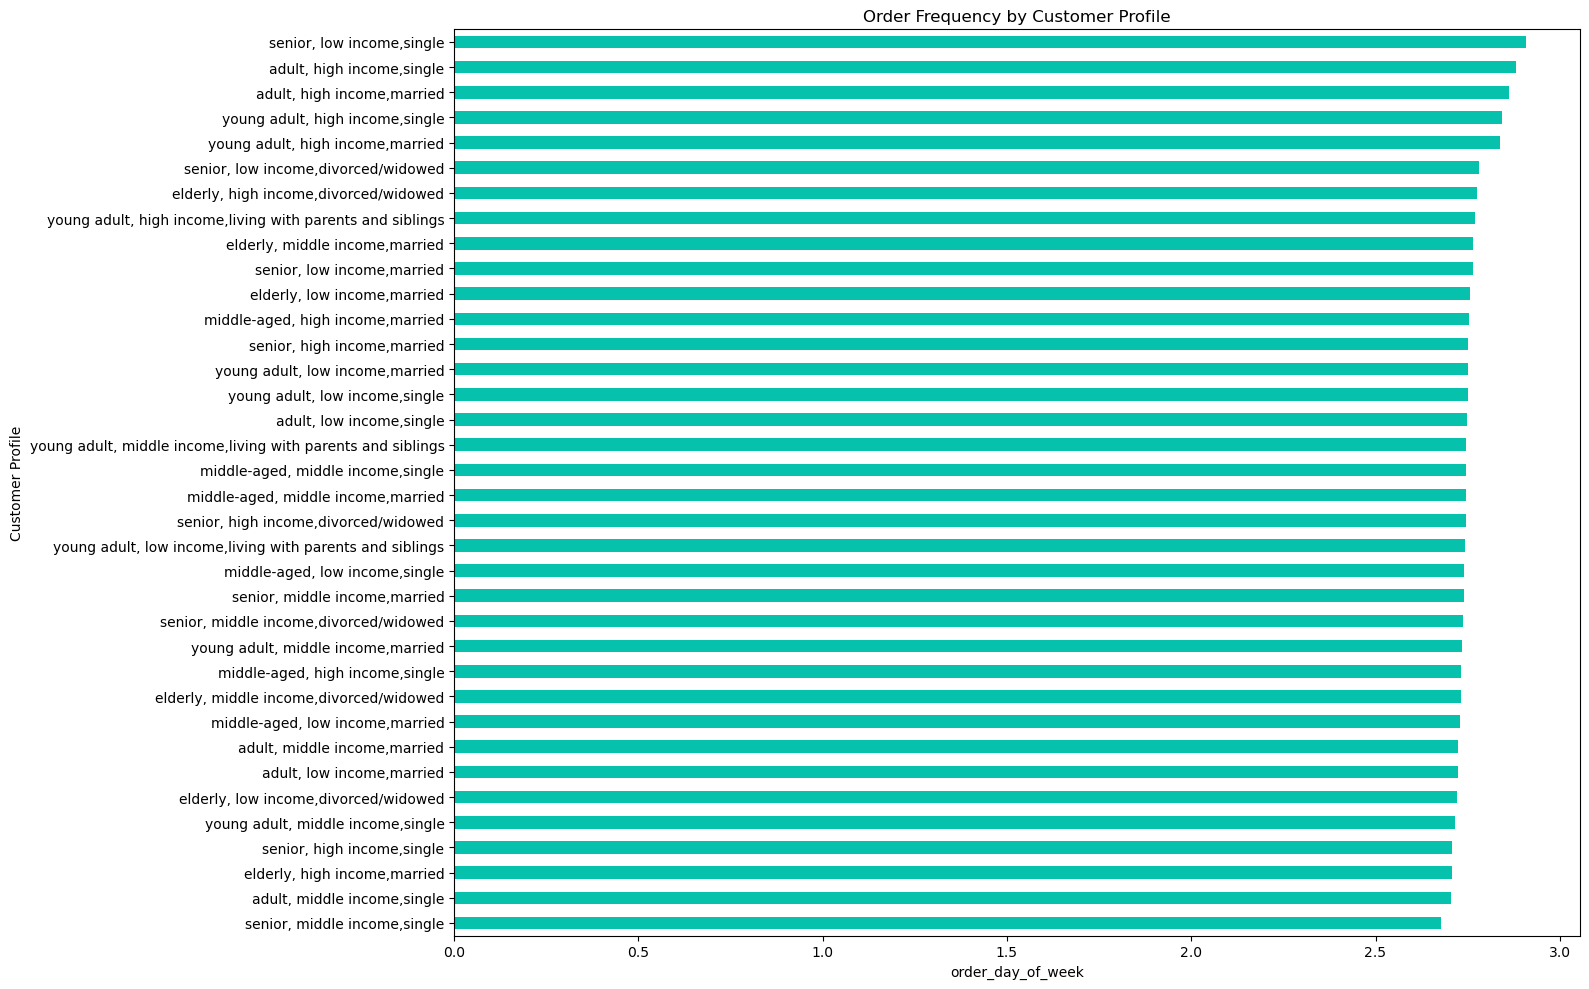

In [33]:
# Plot Horizontal Bar Chart for Order Frequency by Customer Profile

# Set the size of the figure
plt.figure(figsize=(16, 10))  # Adjust width and height as needed

# Plot Horizontal Bar Chart for Order Frequency by Customer Profile
customer_profile_order_frequency_bar = customer_profile_order_frequency_sorted.plot.barh(
    title='Order Frequency by Customer Profile', xlabel='order_day_of_week', ylabel='Customer Profile', color='#06C2AC')

# Format x-axis tick labels without scientific notation
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()

# Show the plot
plt.show()

### Departments

In [34]:
# Define Departments with a dictionary

department_dictionary = {
                            1: 'frozen',
                            2: 'other',
                            3: 'bakery',
                            4: 'produce',
                            5: 'alcohol',
                            6: 'international',
                            7: 'beverages',
                            8: 'pets',
                            9: 'dry goods pasta',
                            10: 'bulk',
                            11: 'personal care',
                            12: 'meat seafood',
                            13: 'pantry',
                            14: 'breakfast',
                            15: 'canned goods',
                            16: 'dairy eggs',
                            17: 'household',
                            18: 'babies',
                            19: 'snacks',
                            20: 'deli',
                                                    }

In [35]:
# Form the department name column and be sure to account for any missing values

df_big['department_name'] = df_big['department_id'].map(department_dictionary).fillna("missing")

In [36]:

df_big['department_name'].value_counts()

department_name
produce            9479291
dairy eggs         5393620
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: count, dtype: int64

### Observing Department Popularity as a Ratio

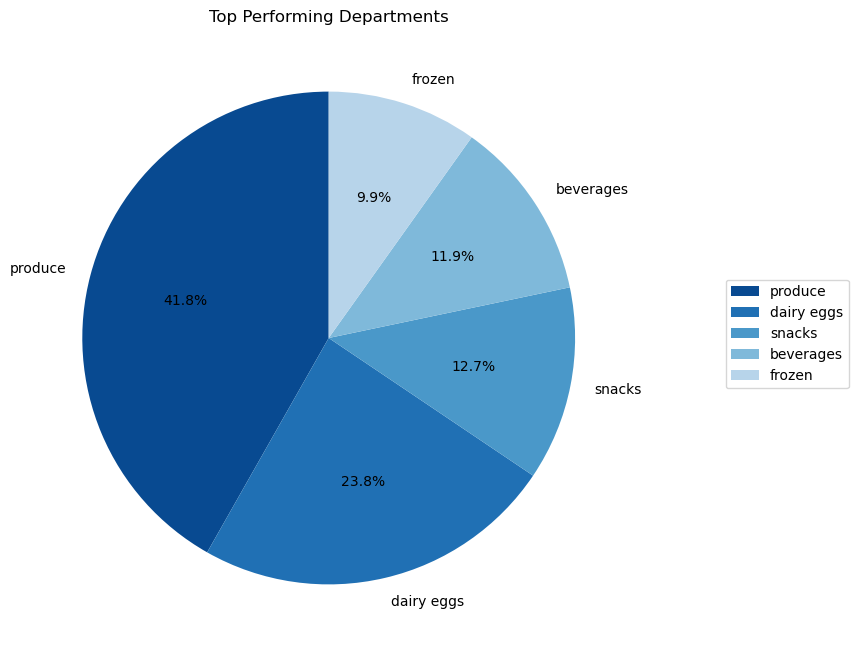

In [37]:
# Calculate the counts of each department
department_counts = df_big['department_name'].value_counts()

# Identify the top 5 departments
top_departments = department_counts.head(5).index

# Group other departments into "Other"
df_big['department_grouped'] =df_big['department_name'].where(df_big['department_name'].isin(top_departments))

# Calculate the percentage of each department group
department_percentage = df_big['department_grouped'].value_counts(normalize=True) * 100

# Define shades of blue
shades_of_blue = plt.cm.Blues(np.linspace(0.9, 0.3, len(department_percentage)))

# Create a pie chart with shades of blue
fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(department_percentage, labels=department_percentage.index, autopct='%1.1f%%', startangle=90, colors=shades_of_blue)

# Add a legend with shades of red
ax.legend(pie[0], department_percentage.index, bbox_to_anchor=(1, 0.5), loc="center left", fontsize=10, bbox_transform=plt.gcf().transFigure)

# Set the title
plt.title('Top Performing Departments', )

# Save the figure as an image
save_path = os.path.join(path, '04 Analysis', 'Visualizations', 'top_departments_pie_chart.png')
plt.savefig(save_path)

# Display the pie chart
plt.show()

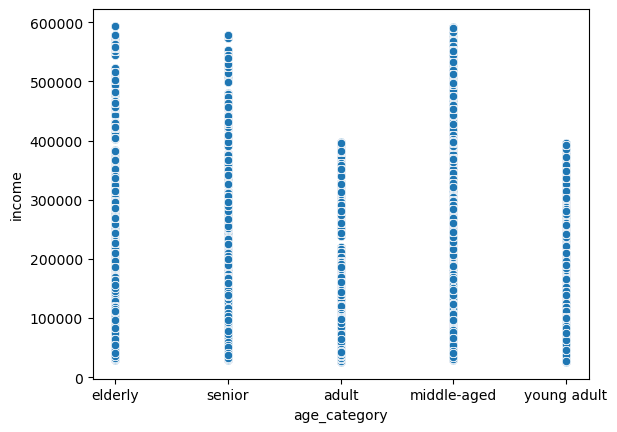

In [38]:
#Creating scatterplots 
age_category_income=sns.scatterplot(x = 'age_category', y = 'income',data = df_big)
#Exporting the scatterplot
age_category_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_category_income.png'))

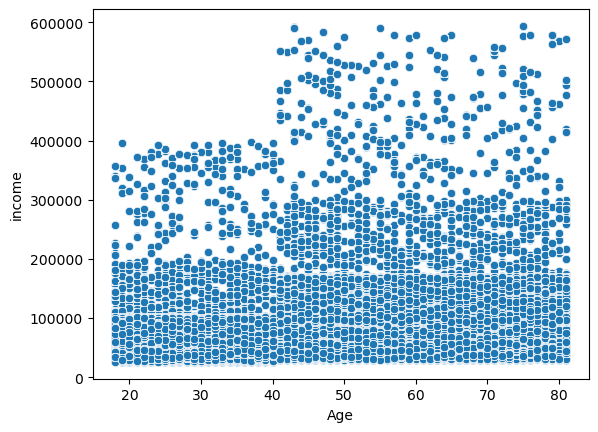

In [39]:
#Create scatterplot 
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income',  data = df_big)

In [40]:
# Create a Crosstab of Region and Spending Flag
spending_by_region = pd.crosstab(df_big['regions'], df_big['spending_flag'], dropna = False)

In [41]:
#Checing output
spending_by_region

spending_flag,high spender,low spender
regions,,
Midwest,2495774,5100291
Northeast,1874326,3847566
South,3547836,7242260
West,2720859,5570820


In [42]:
#Creating total customers by region
total_customers = df_big['regions'].value_counts()

In [43]:
# Filter high spender and low spender categories to make two bar charts
high_spenders = df_big[df_big['spending_flag'] == 'high spender']
low_spenders = df_big[df_big['spending_flag'] == 'low spender']

In [44]:
total_customers

regions
South        10790096
West          8291679
Midwest       7596065
Northeast     5721892
Name: count, dtype: int64

### Defining High and Low Spender Count


In [47]:
#Groupby and count high and low customers by regions
high_spenders_counts = high_spenders.groupby('regions').size()
low_spenders_counts = low_spenders.groupby('regions').size()

In [48]:
#Check output
high_spenders_counts.head()

regions
Midwest      2495774
Northeast    1874326
South        3547836
West         2720859
dtype: int64

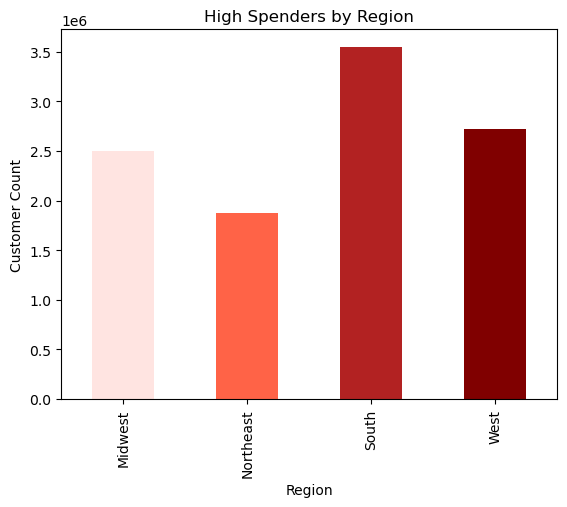

In [49]:
#Creating bar chart for high spenders
#Code for saving chart into object form
bar_regional_high_spenders = high_spenders_counts.plot.bar(color = ['mistyrose', 'tomato', 'firebrick', 'maroon'])
plt.title('High Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()


In [50]:
#Checking output
low_spenders_counts.head()

regions
Midwest      5100291
Northeast    3847566
South        7242260
West         5570820
dtype: int64

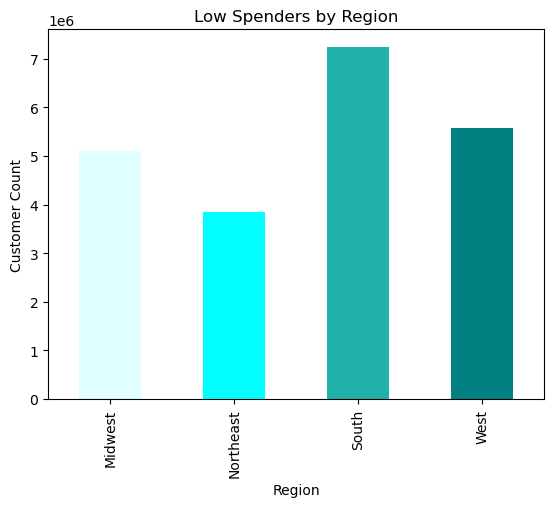

In [51]:
#Creating bar chart for low spenders
#Code for saving into object form
bar_regional_low_spenders = low_spenders_counts.plot.bar(color = ['lightcyan', 'aqua', 'lightseagreen', 'teal'])
plt.title('Low Spenders by Region')
plt.xlabel('Region')
plt.ylabel('Customer Count')
plt.show()


In [65]:
# Create a Crosstab of Region and Spending Flag
spending_by_region = pd.crosstab(df_big['regions'], df_big['spending_flag'], dropna = False)

In [66]:
spending_by_region

spending_flag,high spender,low spender
regions,,
Midwest,2495774,5100291
Northeast,1874326,3847566
South,3547836,7242260
West,2720859,5570820


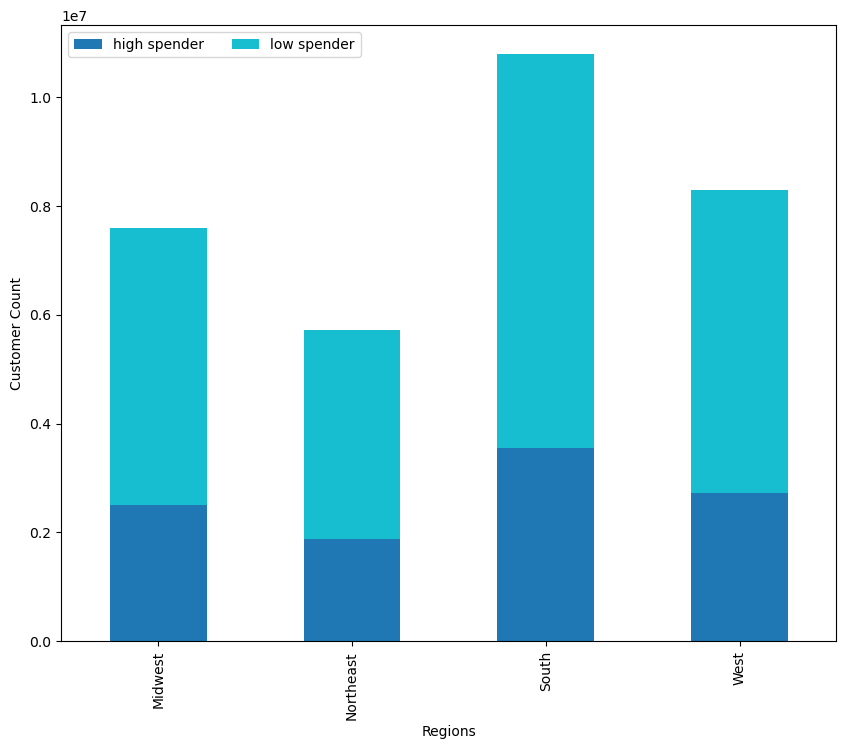

In [75]:
spending_by_region.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 8))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Regions")
plt.ylabel('Customer Count')


   
plt.show()


In [54]:
df_big['prices'].head(8).sort_index()

0    20
1    30
2    15
3    25
4    40
5    10
6    22
Name: prices, dtype: int64

In [55]:
price_stats = df_big['prices'].describe()
min_price = price_stats['min']
max_price = price_stats['max']
price_range = max_price - min_price


In [56]:
price_range

30.0

In [57]:
price_stats = df_big['prices'].describe()

In [58]:
price_stats

count     7.000000
mean     23.142857
std       9.873003
min      10.000000
25%      17.500000
50%      22.000000
75%      27.500000
max      40.000000
Name: prices, dtype: float64

In [79]:
df_big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_big_final2.pkl'))